In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy.optimize as opt
import scipy.signal
import pandas as pd

In [3]:
#%matplotlib inline
tfs = 13 #title font size
lfs = 11 #legend font size
afs = 11 #axis label font size
lw = 0.6 # graph line
ms = 4 # marker size
cs = 2.0 # error bar cap size

font = {'family' : 'times new roman',
        'weight' : 'bold',
        'size'   : 10}
#mpl.rcParams.update(mpl.rcParamsDefault)

mpl.rc('font', **font)

plt.rcParams['lines.markersize'] = ms
mpl.rcParams['lines.linewidth'] = lw
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.labelsize'] = afs

plt.rcParams['axes.titlesize'] = tfs
plt.rcParams['axes.titlepad'] = 8
plt.rcParams['axes.titleweight'] = 'bold'


mpl.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = 'times new roman'

plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams["figure.figsize"] = (5,3)
plt.rcParams["figure.dpi"] = 400
mpl.rcParams['axes.linewidth'] = 1.4

plt.rcParams["legend.frameon"] = False
plt.rcParams["legend.fontsize"] = lfs

plt.rcParams["xtick.direction"] = 'in'
plt.rcParams["xtick.minor.visible"] = True 
plt.rcParams["ytick.direction"] = 'in'
plt.rcParams["ytick.minor.visible"] = True 

In [4]:
data = np.loadtxt('chromo1.txt',dtype=np.str)

/tmp/ipykernel_3340538/1828216510.py:1: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data = np.loadtxt('chromo1.txt',dtype=np.str)


In [5]:
listt = ['N','R', 'Y','K',"M","S", "W", "B", 'D', "H", "V", "N"]

raw = list(filter(lambda a: not a in listt,''.join(data)))

In [6]:
dict1 = {'A':1, 'T': -1, "G":1j, "C" : -1j,'a':1, 't': -1, "g":1j, "c" : -1j}
dict2 = {'A':0, 'T': 0, "G":0, "C" : 0,'a':1, 't': 1, "g":1, "c" : 1}

In [7]:
num = np.asarray([dict1.get(item,item)  for item in raw], dtype = 'c16')
mask = np.array([dict2.get(item,item)  for item in raw], dtype = 'int32')

/home/hyunsu/miniconda3/envs/notebook/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


findfont: Font family ['times new roman'] not found. Falling back to DejaVu Sans.


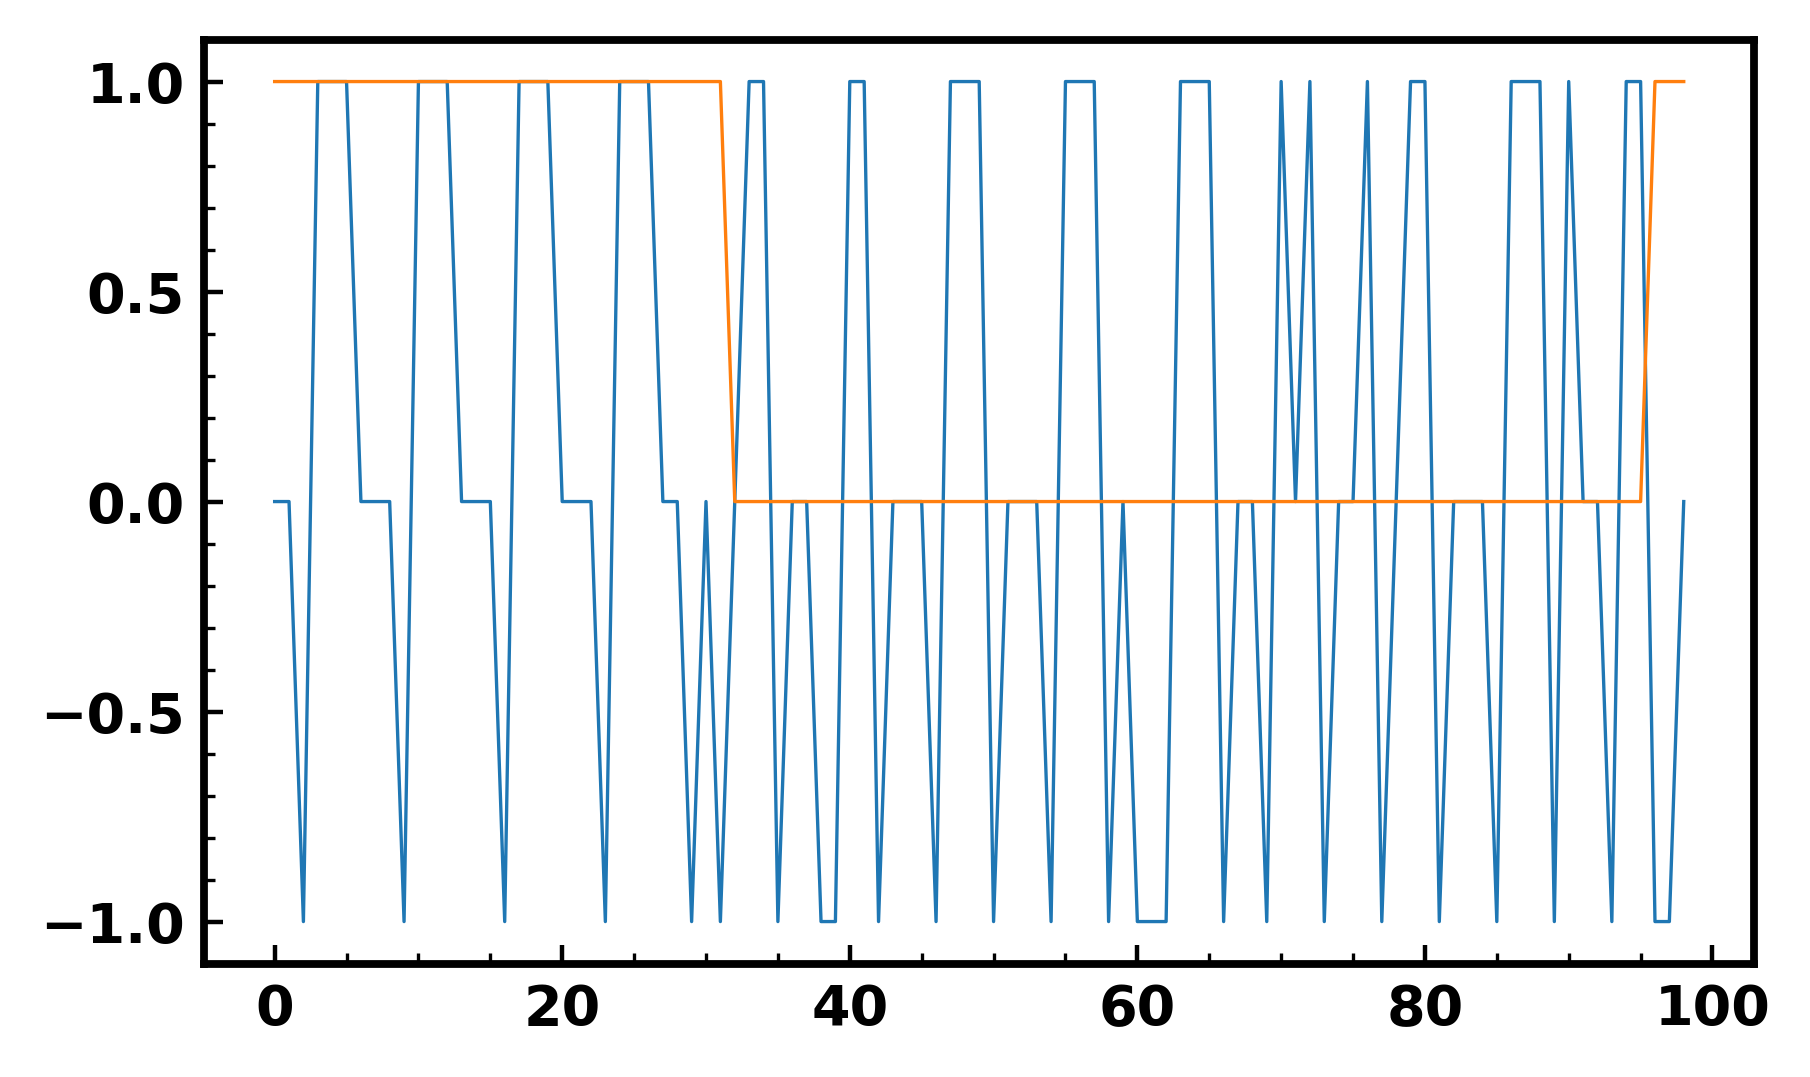

In [8]:
plt.plot(num[1:100])
plt.plot(mask[1:100])

In [10]:
import pywt

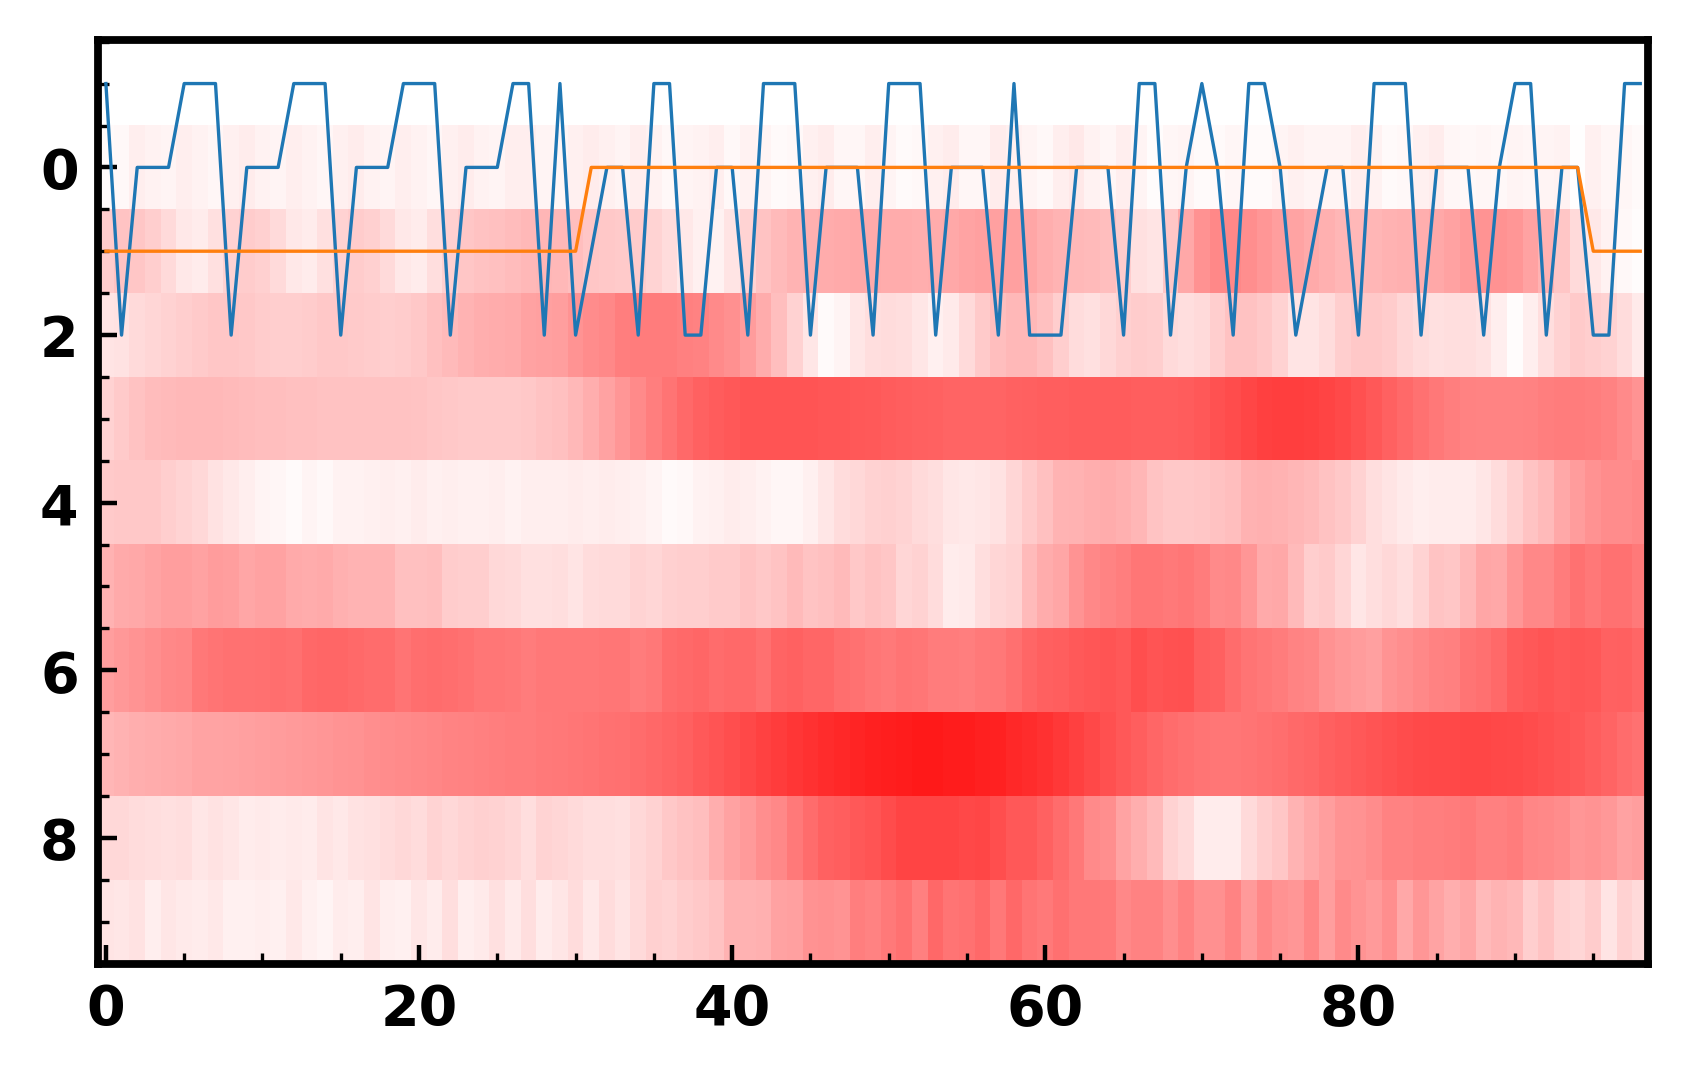

In [15]:
start = 1
cwtmatr, freqs = pywt.cwt(num[1+start:100+start], [1, 2, 3, 4,5,6,7,8,9,10], 'cmor3-1.0')
plt.imshow(np.absolute(cwtmatr),  cmap='bwr', aspect='auto',vmax=1.0886128668757087, vmin=-1.0886128668757087) 
plt.plot(np.angle(num[1+start:100+start])/1.57)
plt.plot(mask[1+start:100+start])
plt.show() 

In [21]:
abs(cwtmatr).max()

0.925968813056149

In [28]:
test1 = np.asarray(([1,-1,-1,1j]*6+[1,1j]*3)*2, dtype = 'c16')
test2 = np.asarray(np.random.choice([1,-1,1j,-1j],50), dtype = 'c16')

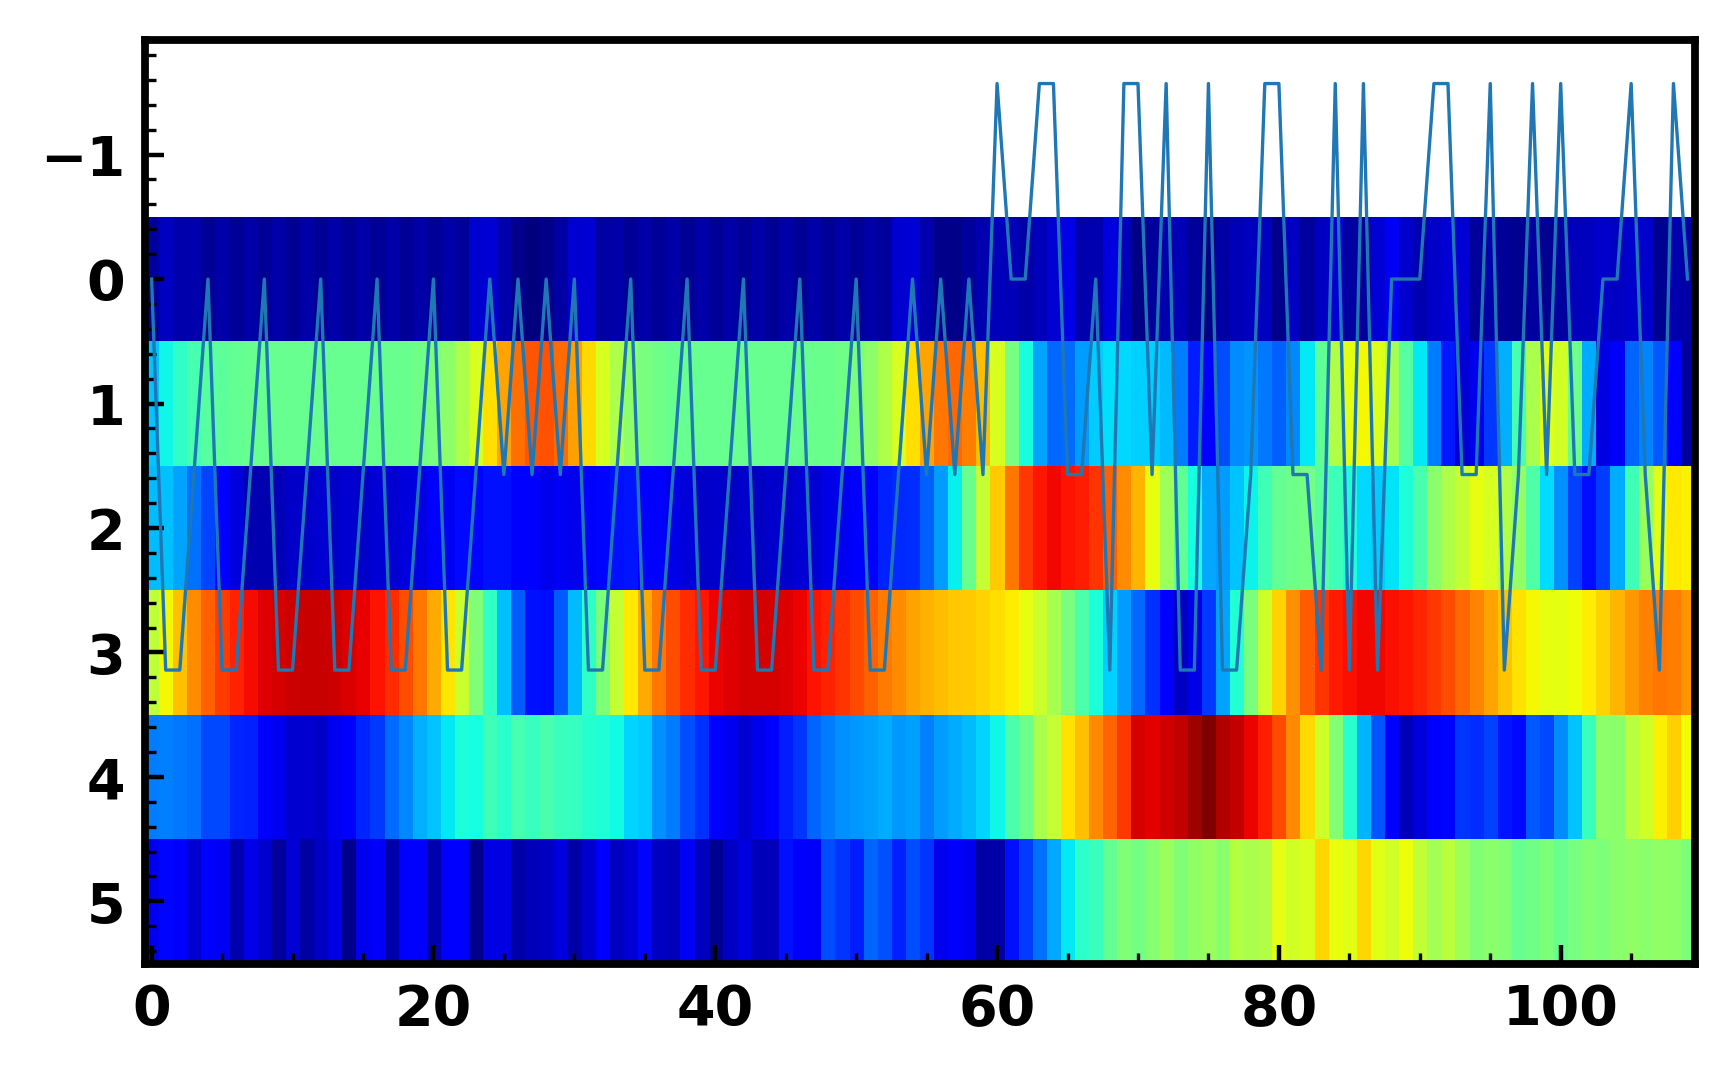

In [38]:
cwtmatr, freqs = pywt.cwt(np.concatenate([test1,test2]), [1, 2, 3, 4,5,6], 'cmor4-1.0')
plt.imshow(np.absolute(cwtmatr),  cmap='jet', aspect='auto', vmax=abs(cwtmatr).max(), vmin=0) 
plt.plot(np.angle(np.concatenate([test1,test2])))

#plt.plot(mask[1:150])
plt.show() 

In [187]:
def draw_stft(f, t, Zxx):
    plt.figure(figsize=(12,5))
    plt.pcolormesh(t, f, np.abs(Zxx), vmin=0, vmax=1, shading='gouraud')
    plt.title('STFT Magnitude'); plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]'); plt.show()
from scipy import signal



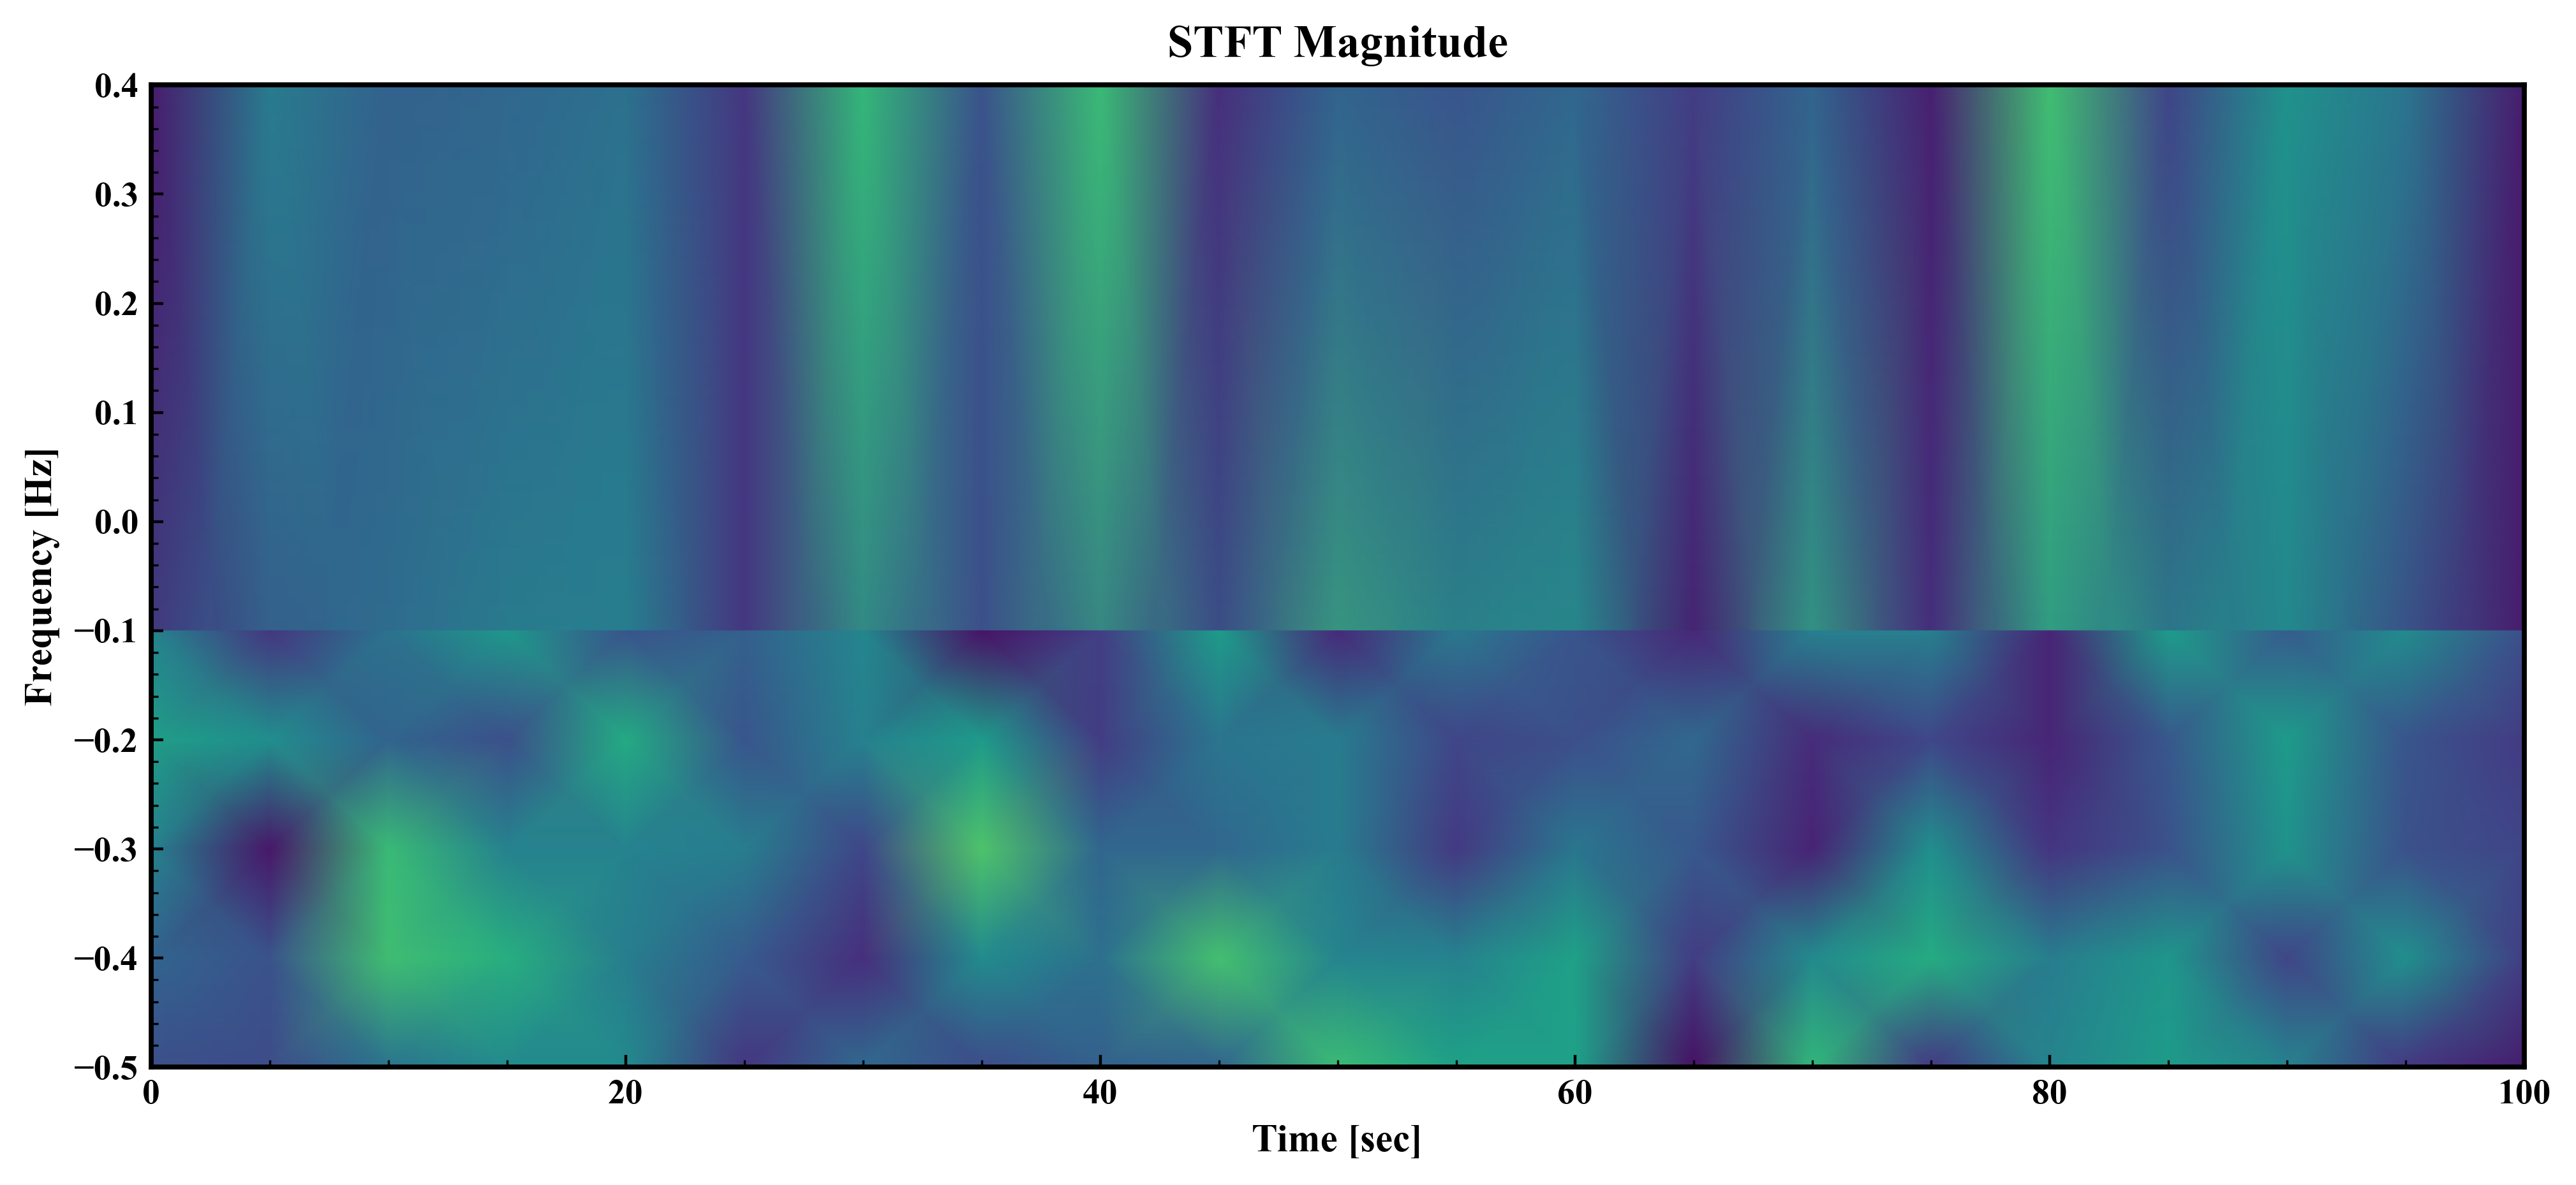

In [219]:
f, t, Zxx = signal.stft(test, nperseg=10)
draw_stft(f, t, Zxx)

In [190]:
f

array([ 0.        ,  0.03333333,  0.06666667,  0.1       ,  0.13333333,
        0.16666667,  0.2       ,  0.23333333,  0.26666667,  0.3       ,
        0.33333333,  0.36666667,  0.4       ,  0.43333333,  0.46666667,
       -0.5       , -0.46666667, -0.43333333, -0.4       , -0.36666667,
       -0.33333333, -0.3       , -0.26666667, -0.23333333, -0.2       ,
       -0.16666667, -0.13333333, -0.1       , -0.06666667, -0.03333333])

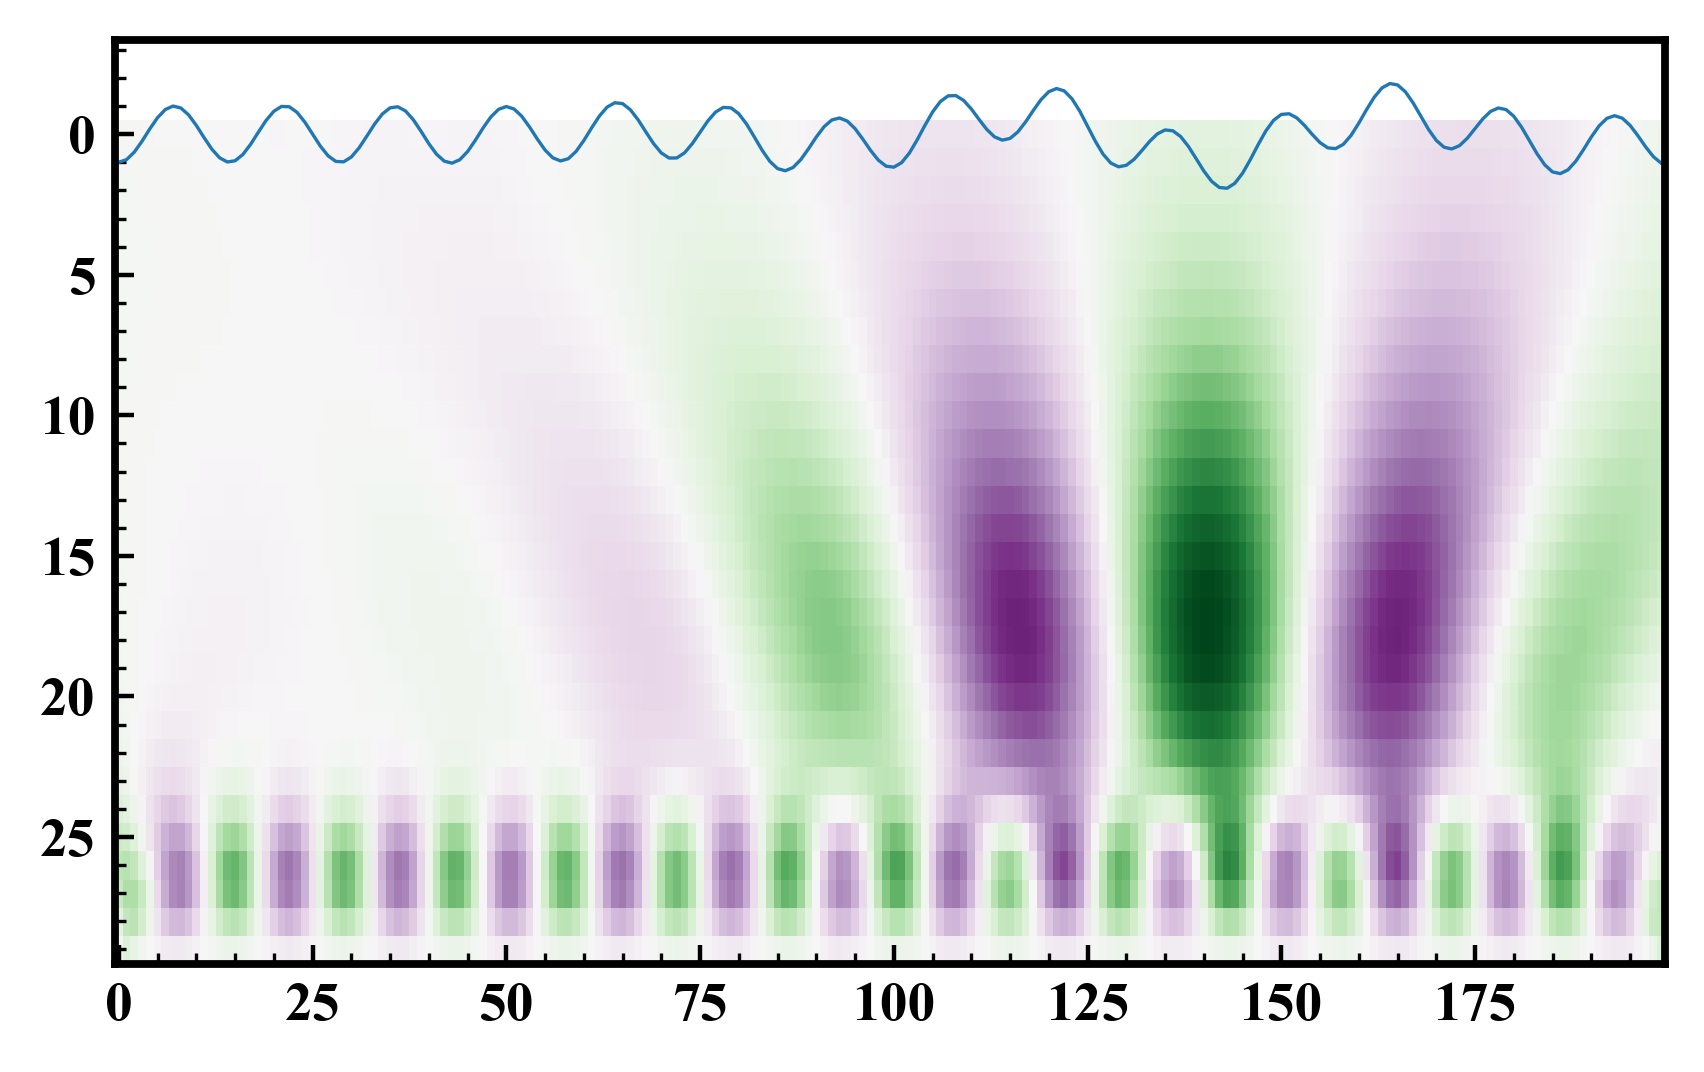

In [204]:
t = np.linspace(-1, 1, 200, endpoint=False)
sig  = np.cos(2 * np.pi * 7 * t) + signal.gausspulse(t - 0.4, fc=2)
widths = np.arange(1, 31)
cwtmatr = signal.cwt(sig, signal.ricker, widths)


cwtmatr_yflip = np.flipud(cwtmatr)
plt.imshow(cwtmatr_yflip,  cmap='PRGn', aspect='auto',
           vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())
plt.plot(sig)
plt.show()